## Figure 2

**Stochastic Kinetics of mRNA Molecules in a General Transcription Model**

*Yuntao Lu and Yunxin Zhang*

School of Mathematical Sciences, Fudan University, Shanghai 200433, China

Email: `yuntaolu22@m.fudan.edu.cn` and `xyz@fudan.edu.cn`

In [7]:
import scipy.linalg as linalg
import numpy as np
import math
import matplotlib.pyplot as plt

In [5]:
# import parameter matrices prepared for figures in the paper
import sys
import os

current_dir = os.path.dirname(os.path.abspath('Fig2.ipynb'))
parent_dir = os.path.dirname(current_dir)


sys.path.append(parent_dir)

import Parameters_for_Figures

In [6]:
D0=Parameters_for_Figures.D0_2
D1=Parameters_for_Figures.D1_2

In [10]:
def bound1(D0,D1):
    x=linalg.norm(D1, np.inf)
    b=[1]
    for i in range(1,101):
        y=1/math.factorial(i)*(x)**i
        b.append(y)
    return b
def bound2(D0,D1):
    x=linalg.norm(D1, np.inf)
    z=np.exp(x)
    p=[1]
    for i in range(1,101):
        y=1/math.factorial(i)*z*(x**i)
        p.append(y)
    return p

In [11]:
bound1=bound1(D0,D1)
bound2=bound2(D0,D1)

In [12]:
# np.save('Fig2_bound1.npy', bound1)
# np.save('Fig2_bound2.npy', bound2)

In [8]:
# load results from `.npy` files
Bound1 = np.load('Fig2_bound1.npy')
Bound1 = Bound1.tolist()
Bound2 = np.load('Fig2_bound2.npy')
Bound2 = Bound2.tolist()

In [9]:
moment = np.load('Fig2_moment.npy')
moment = moment.tolist()
density = np.load('Fig2_density.npy')
density = density.tolist()

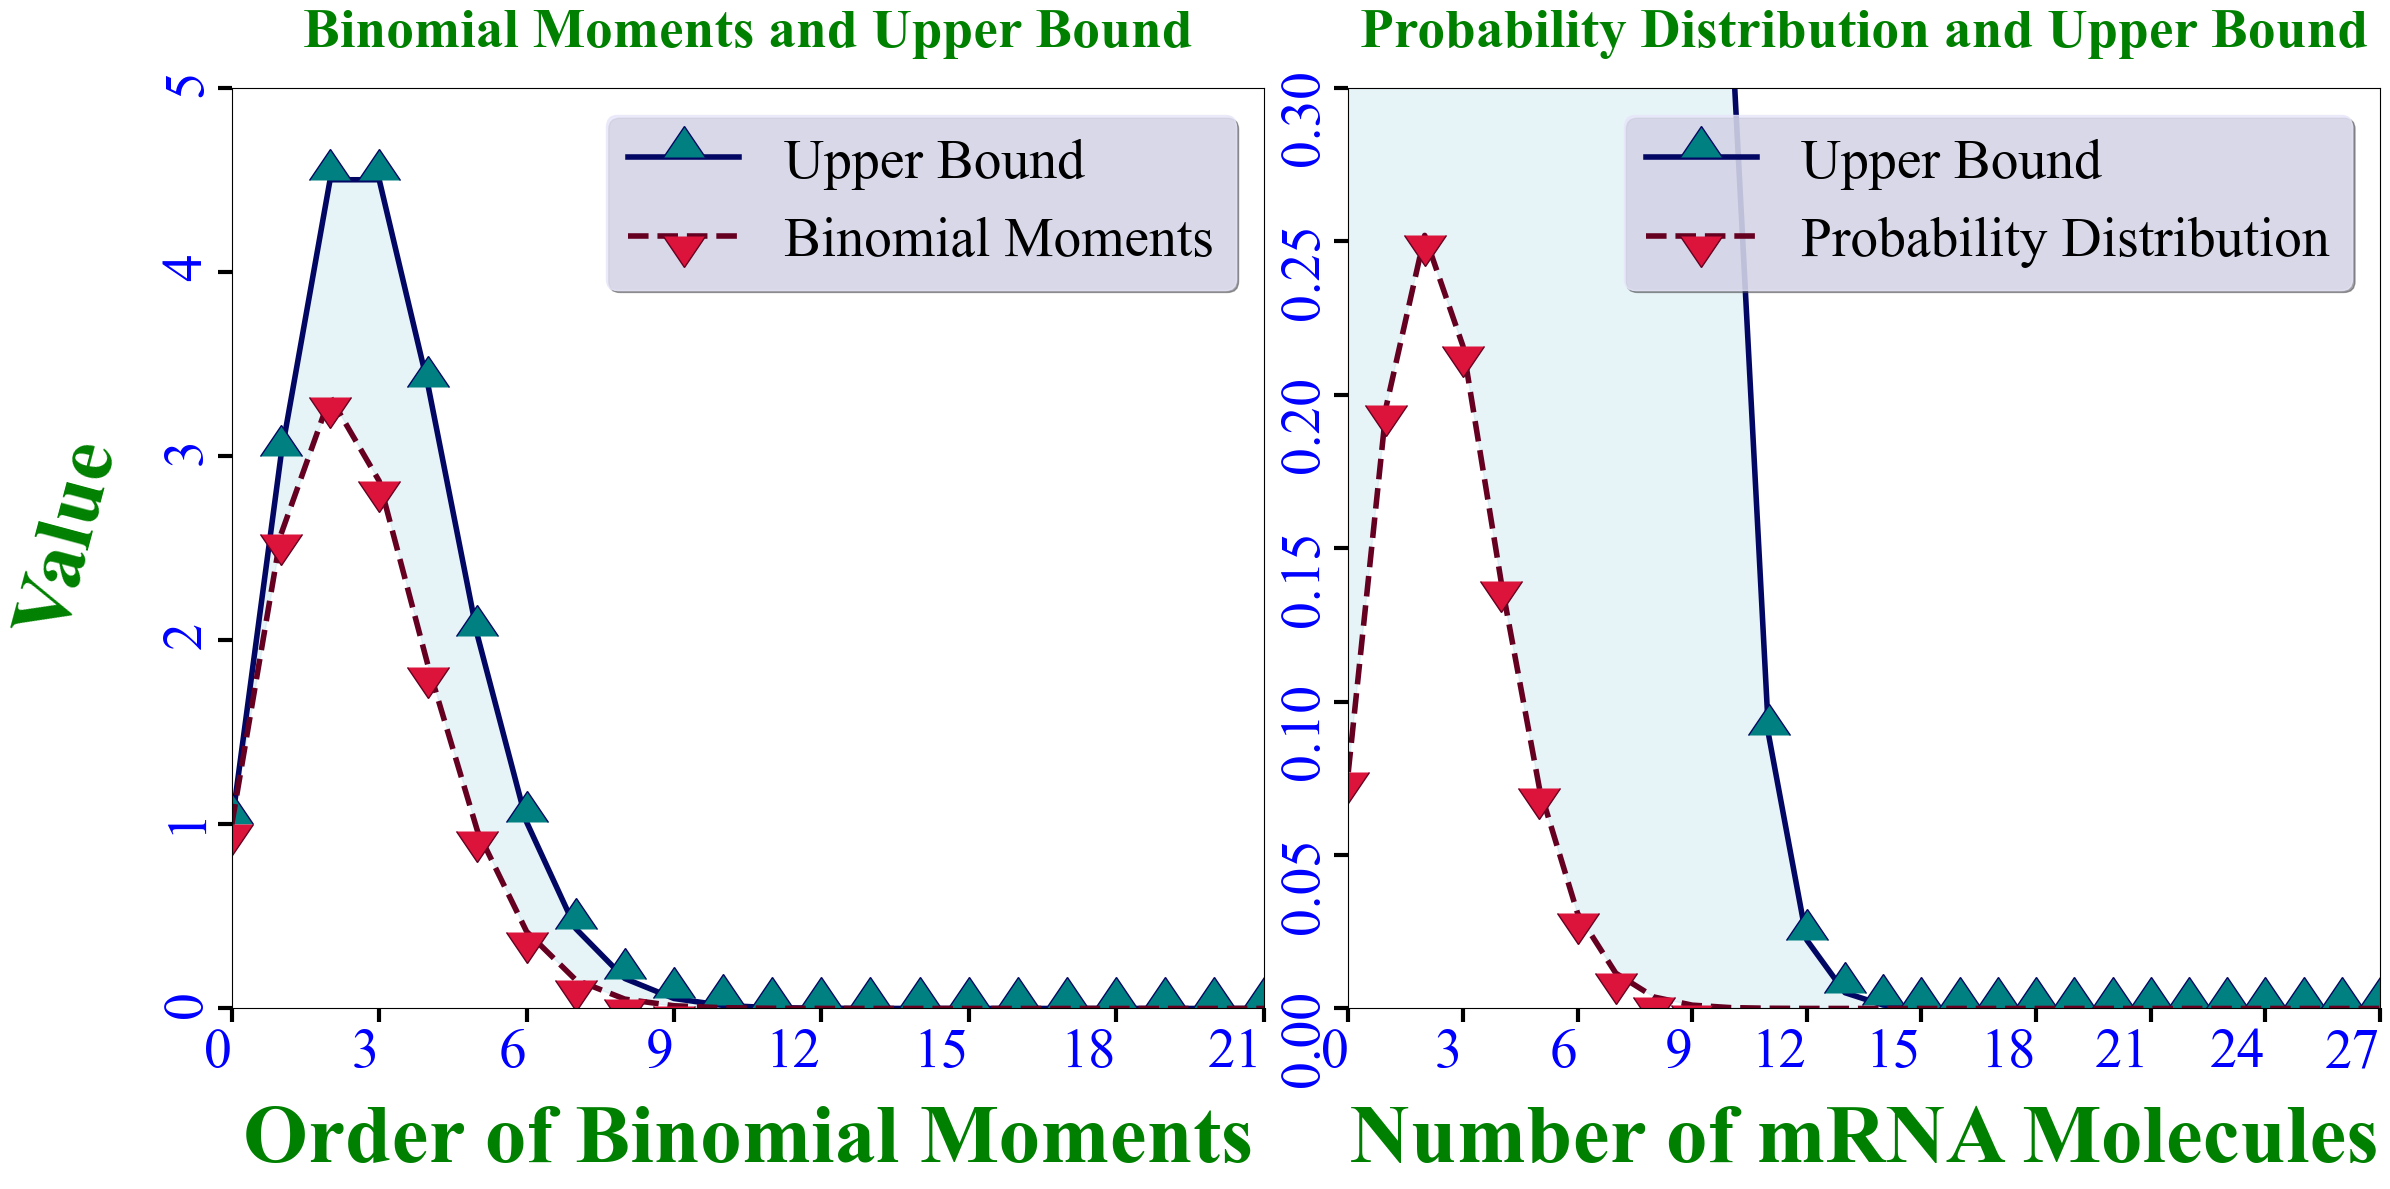

In [17]:
# plt.figure(figsize=(24, 12))  
plt.rcParams['axes.linewidth'] = 3
plt.style.use('default')
# plt.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))


dim1 = list(range(26))
ax1.plot(dim1, Bound1[0:26], label="Upper Bound", color="#030764", marker=10, linestyle="-",
         markerfacecolor='#008080', linewidth=4, markersize=30)
ax1.plot(dim1, moment[0:26], color='#650021', linestyle='--', marker=11, markerfacecolor='#DC143C',
         linewidth=4, label='Binomial Moments', markersize=30)
ax1.fill_between(dim1, moment[0:26], Bound1[0:26], color="#ADD8E6", alpha=0.3)
ax1.set_xlim(0, 21)
ax1.set_ylim(0, 5)
ax1.set_xticks(ticks=list(range(0, 24, 3)))
ax1.set_xticklabels([str(x) for x in range(0, 24, 3)],
                   fontsize=40, color='blue', fontname='Times New Roman', ha='right')
ax1.set_yticks(ticks=np.arange(0, 6, 1))
ax1.set_yticklabels([str(y) for y in np.arange(0, 6, 1)],
                   fontsize=40, color='blue', rotation=90, 
                   fontname='Times New Roman', ha='right')
ax1.set_title('Binomial Moments and Upper Bound',
              fontname='Times New Roman', fontsize=40, fontweight='bold', color='green', pad=30)
ax1.set_xlabel('Order of Binomial Moments', fontsize=60, fontweight='bold',
               labelpad=20, fontname='Times New Roman', color='green')
ax1.set_ylabel('Value', fontsize=60, fontweight='bold',
               labelpad=40, fontname='Times New Roman', color='green', rotation=75)
ax1.tick_params(direction='out', width=3, length=10)
legend1 = ax1.legend(loc='upper right', frameon=True, shadow=True, markerscale=1,
                    fancybox=True, prop={'family': 'Times New Roman', 'size': 40})
legend1.get_frame().set_color('#E6E6FA')
legend1.get_frame().set_alpha(0.8)


dim2 = list(range(31))
ax2.plot(dim2, Bound2[0:31], label="Upper Bound", color="#030764", marker=10, linestyle="-",
         markerfacecolor='#008080', linewidth=4, markersize=30)
ax2.plot(dim2, density[0:31], color='#650021', linestyle='--', marker=11, markerfacecolor='#DC143C',
         linewidth=4, label='Probability Distribution', markersize=30)
ax2.fill_between(dim2, density[0:31], Bound2[0:31], color="#ADD8E6", alpha=0.3)
ax2.set_xlim(0, 27)
ax2.set_ylim(0, 0.3)
ax2.set_xticks(ticks=list(range(0, 30, 3)))
ax2.set_xticklabels([str(x) for x in range(0, 30, 3)],
                   fontsize=40, color='blue', fontname='Times New Roman', ha='right')
ax2.set_yticks(ticks=np.arange(0, 0.35, 0.05))
ax2.set_yticklabels([f"{y:.2f}" for y in np.arange(0, 0.35, 0.05)],
                   fontsize=40, color='blue', rotation=90, 
                   fontname='Times New Roman', ha='right')
ax2.set_title('Probability Distribution and Upper Bound',
              fontname='Times New Roman', fontsize=40, fontweight='bold', color='green', pad=30)
ax2.set_xlabel('Number of mRNA Molecules', fontsize=60, fontweight='bold',
               labelpad=20, fontname='Times New Roman', color='green')
# ax2.set_ylabel('Value', fontsize=45, fontweight='bold',
#                labelpad=40, fontname='Times New Roman', color='green', rotation=75)
ax2.tick_params(direction='out', width=3, length=10)
legend2 = ax2.legend(loc='upper right', frameon=True, shadow=True, markerscale=1,
                    fancybox=True, prop={'family': 'Times New Roman', 'size': 40})
legend2.get_frame().set_color('#E6E6FA')
legend2.get_frame().set_alpha(0.8)

plt.tight_layout()  
# plt.savefig('Fig2.pdf', format='pdf', edgecolor='black', dpi=800)
plt.show()